## This program attempts to optimize a users portfolio using the Efficient Frontier method

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 10.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
#Import the python libraries
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock tickers in the portfolio
assets = ['MARUTI.NS','RELIANCE.NS','AWL.NS','HINDUNILVR.NS']

In [ ]:
#Assign weights to the stocks.
weights = np.array([0.25,0.25,0.25,0.25])

In [ ]:
# Get the stock/ portfolio starting date
stockStartDate = '2018-01-01'

In [ ]:
# Get the stocks' ending date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2023-03-05'

In [ ]:
import yfinance as yfin
yfin.pdr_override()

In [ ]:
# Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

# Store the adjusted close price of the sock into the df
for stock in assets:
  df[stock] = pdr.get_data_yahoo(stock,start=stockStartDate,end=today)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# show df
df

,MARUTI.NS,RELIANCE.NS,AWL.NS,HINDUNILVR.NS
Date,,,,
2018-01-01,9150.264648,881.918213,NaN,1240.114258
2018-01-02,9057.500000,883.275330,NaN,1234.672241
2018-01-03,8927.193359,886.813721,NaN,1245.509888
2018-01-04,8898.419922,892.145447,NaN,1247.262207
2018-01-05,8943.546875,895.005188,NaN,1251.228638
...,...,...,...,...
2023-02-27,8632.200195,2367.850098,344.450012,2468.149902
2023-02-28,8624.349609,2322.550049,361.649994,2460.649902
2023-03-01,8764.150391,2343.899902,379.700012,2466.250000


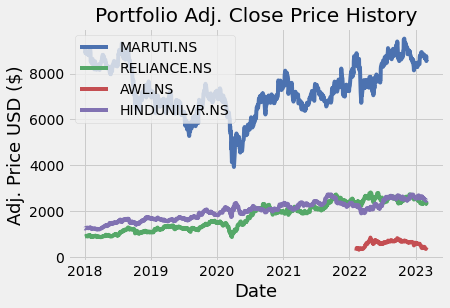

In [ ]:
# Visually show the stock/ portfolio
title = 'Portfolio Adj. Close Price History'

# Get the stocks
my_stocks = df

# Create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c],label=c)

plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values,loc='upper left')
plt.show()

In [ ]:
# show the daily simple return
returns = df.pct_change()
returns

,MARUTI.NS,RELIANCE.NS,AWL.NS,HINDUNILVR.NS
Date,,,,
2018-01-01,NaN,NaN,NaN,NaN
2018-01-02,-0.010138,0.001539,NaN,-0.004388
2018-01-03,-0.014387,0.004006,NaN,0.008778
2018-01-04,-0.003223,0.006012,NaN,0.001407
2018-01-05,0.005071,0.003205,NaN,0.003180
...,...,...,...,...
2023-02-27,-0.003268,-0.006649,-0.049924,-0.006461
2023-02-28,-0.000909,-0.019131,0.049935,-0.003039
2023-03-01,0.016210,0.009192,0.049910,0.002276


In [ ]:
# Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov()*252
cov_matrix_annual

,MARUTI.NS,RELIANCE.NS,AWL.NS,HINDUNILVR.NS
MARUTI.NS,0.102904,0.040548,0.043245,0.028621
RELIANCE.NS,0.040548,0.098404,0.040839,0.023743
AWL.NS,0.043245,0.040839,0.379072,0.014096
HINDUNILVR.NS,0.028621,0.023743,0.014096,0.059321


In [ ]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

0.06386775513666872

In [ ]:
# Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.2527207057933099

In [ ]:
# Calculate the annual portfolio return
portfolio_simple_annual_return = np.sum(returns.mean()*weights)*252
portfolio_simple_annual_return

0.26379913778622377

In [ ]:
# Sow the expected annual return, volatility (risk), and variance
percent_var = str(round(port_variance,2)*100)+'%'
percent_vola = str(round(port_volatility,2)*100)+'%'
percent_ret = str(round(portfolio_simple_annual_return,2)*100)+'%'

print('Expected annual return: '+percent_ret)
print('Annual volatility/ risk: '+percent_vola)
print('Annual variance: '+percent_var)

Expected annual return: 26.0%
Annual volatility/ risk: 25.0%
Annual variance: 6.0%


In [ ]:
!pip install PyPortfolioOpt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

In [ ]:
# Portfolio Optimization

# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('MARUTI.NS', -0.70412), ('RELIANCE.NS', 0.59686), ('AWL.NS', 0.42133), ('HINDUNILVR.NS', 0.68594)])
Expected annual return: 45.8%
Annual volatility: 37.7%
Sharpe Ratio: 1.16


(0.4584562823938079, 0.3768510406154081, 1.1634737207512995)

In [ ]:
# Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights,latest_prices,total_portfolio_value = 50000)

allocation,leftover = da.lp_portfolio()
print('Discrete allocation: ',allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation:  {'RELIANCE.NS': 7, 'AWL.NS': 31, 'HINDUNILVR.NS': 8, 'MARUTI.NS': -4}
Funds remaining: $1360.15


OrderedDict([('MARUTI.NS', -1.0), ('RELIANCE.NS', 0.99867), ('AWL.NS', 1.0), ('HINDUNILVR.NS', 0.00133)])
Expected annual return: 75.3%
Annual volatility: 70.3%
Sharpe Ratio: 1.04


(0.752795144719791, 0.7030154233889316, 1.0423599829251318)

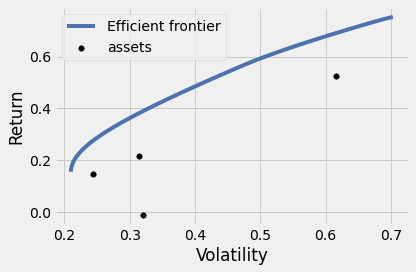

In [ ]:
# Portfolio Optimization

# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)
plotting.plot_efficient_frontier(ef)
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

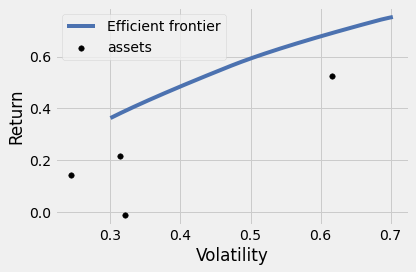

OrderedDict([('MARUTI.NS', -1.0), ('RELIANCE.NS', 1.0), ('AWL.NS', 1.0), ('HINDUNILVR.NS', 0.0)])
Expected annual return: 75.3%
Annual volatility: 70.3%
Sharpe Ratio: 1.04


(0.752891681797512, 0.7031868296076523, 1.0422431862189934)

In [ ]:
# Portfolio Optimization

# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)
# 100 portfolios with risks between 0.10 and 0.30
risk_range = np.linspace(0.30, 0.80, 1000)
plotting.plot_efficient_frontier(ef, ef_param="risk", ef_param_range=risk_range,show_assets=True, showfig=True)

cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)


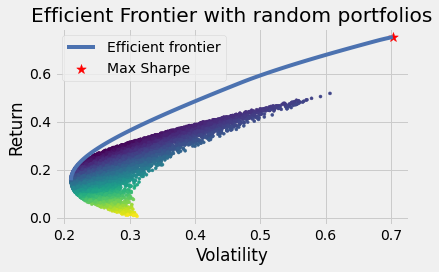

In [ ]:
# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt(np.diag(w @ S @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()